In [1]:
# useful additional packages 
import random
import math
from math import pi
from sympy.ntheory import isprime

# importing the QISKit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QISKitError, QuantumJob
from qiskit import available_backends, execute, register, get_backend, compile
from qiskit.tools.visualization import plot_histogram, circuit_drawer

In [2]:
def qfa_speedup(string, prime):
    if isprime(prime) == False:
        raise ValueError("This number is not a prime") #Raises a ValueError if the input prime number is not prime
    else:
        n = math.ceil((math.log(math.log(prime)))) + 1 #Represents log(log(p)) control qubits with 1 target qubit
        qr = QuantumRegister(n) #Creates a quantum register of length log(log(prime)) + 1
        cr = ClassicalRegister(n) #Creates a classical register of length log(log(prime)) + 1
        circuitName = "QuantumFiniteAutomata" #Name of the circuit/algorithm 
        qfaCircuit = QuantumCircuit(qr, cr) #Defining the circuit to take in the values of qr and cr
        for x in range(n-1): #We want to take each qubit and put them in a superposition by applying a Hadamard Gate
            qfaCircuit.h(qr[x])
        for letter in string: #For each letter in the string, we want to apply a series of Controlled Y-rotations
            for x in range(n-1):
                qfaCircuit.cu3(2*math.pi*(2**x)/prime, (math.pi)/2, (math.pi)/2, qr[x], qr[n-1])
                qfaCircuit.cu3(-2*math.pi, (math.pi)/2, (math.pi)/2, qr[x], qr[n-1])
        qfaCircuit.measure(qr[n-1], cr[n-1]) #Measure the target qubit    
        return qfaCircuit #Returns the created quantum circuit

In [3]:
params = qfa_speedup("a"*46, 23)
job = execute(params, "local_qasm_simulator")
result = job.result()
print(result.get_counts(params))

{'000': 1024}


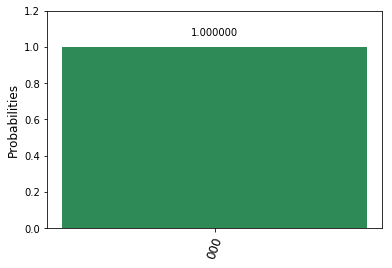

In [4]:
plot_histogram(result.get_counts(params))